In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import earthpy as et
import math 
from shapely.geometry import Point
import geopandas

# set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics\\nooksack'))
os.getcwd()

'C:\\Users\\John Pitlick\\earth-analytics\\nooksack'

In [162]:
xs_28 = pd.read_csv('mosq_xs27.csv')

xs_28 = xs_28.dropna(how='all')
xs_28.tail()

,dist,elev,remarks,x,y
38,57.3,97.58,REW,NaN,NaN
39,57.8,97.88,NaN,NaN,NaN
40,58.8,99.24,NaN,NaN,NaN
41,59.3,99.28,REP BOP XS27,565181.4227,5403949.592
42,59.3,99.54,REP TOP XS27,NaN,NaN


In [143]:
coords = xs_28.dropna(subset=["x"])
coords

,dist,elev,remarks,x,y
0,0.0,99.17,MP TOP,565122.8301,5403939.968
39,63.8,99.45,REP BOP XS26,565180.5264,5403913.476


In [144]:
lep = coords.iloc[0]
rep = coords.iloc[1]

angle = math.atan((lep.y-rep.y)/(lep.x-rep.x))
angle

-0.43044761046825386

In [145]:
length = math.sqrt(((lep.x-rep.x)**2)+((lep.y-rep.y)**2))
length

63.487708240763936

In [146]:
if lep.x <= rep.x and lep.y <= rep.y:
    xs_28['east'] = lep.x + (math.cos(angle)*(xs_28.dist-lep.dist))
    xs_28['nrth'] = lep.y + (math.sin(angle)*(xs_28.dist-lep.dist))
    print("west-east, south-north")
elif lep.x <= rep.x and lep.y >= rep.y:
    xs_28['east'] = lep.x + (math.cos(angle)*(xs_28.dist-lep.dist))
    xs_28['nrth'] = lep.y + (math.sin(angle)*(xs_28.dist-lep.dist))
    print("west-east, north-south")
elif lep.x >= rep.x and lep.y <= rep.y:
    xs_28['east'] = lep.x + (math.cos(angle)*(xs_28.dist-lep.dist))
    xs_28['nrth'] = lep.y + (math.sin(angle)*(xs_28.dist-lep.dist))
    print("east-west, south-north")
elif lep.x >= rep.x and lep.y <= rep.y:
    xs_28['east'] = lep.x + (math.cos(angle)*(xs_28.dist-lep.dist))
    xs_28['nrth'] = lep.y - (math.sin(angle)*(xs_28.dist-lep.dist))
    print("east-west, north-south")

xs_28

west-east, north-south


,dist,elev,remarks,x,y,east,nrth
0,0.0,99.17,MP TOP,565122.8301,5403939.968,565122.830100,5.403940e+06
1,3.2,98.88,NaN,NaN,NaN,565125.738193,5.403939e+06
2,6.2,98.96,NaN,NaN,NaN,565128.464530,5.403937e+06
3,9.2,98.80,NaN,NaN,NaN,565131.190867,5.403936e+06
4,12.2,98.71,NaN,NaN,NaN,565133.917205,5.403935e+06
5,15.2,98.40,Woody debris,NaN,NaN,565136.643542,5.403934e+06
6,17.3,98.60,NaN,NaN,NaN,565138.551978,5.403933e+06
7,20.1,98.52,NaN,NaN,NaN,565141.096559,5.403932e+06
8,26.0,98.28,NaN,NaN,NaN,565146.458356,5.403929e+06
9,28.4,97.95,LEW,NaN,NaN,565148.639425,5.403928e+06


In [147]:
# Combine east and nrth column to a shapely Point() object
xs_28['geometry'] = xs_28.apply(lambda x: Point((float(x.east), float(x.nrth))), axis=1)

In [148]:
xs_28 = geopandas.GeoDataFrame(xs_28, geometry='geometry')

xs_28.crs = {'init' :'epsg:32610'}

xs_28.to_file('xs_28_pts.shp', driver='ESRI Shapefile')

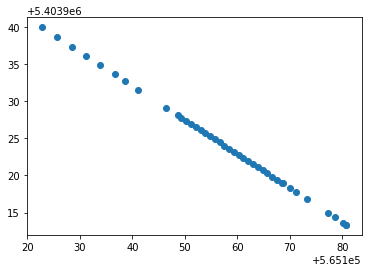

In [149]:
fix, ax = plt.subplots()
plt.scatter(xs_28["east"],
           xs_28["nrth"])
plt.show()